<a href="https://colab.research.google.com/github/Ananya-S-Krishna/used-car-price-predictor/blob/main/Used_Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd               # Basic libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")        # Set up plotting styles

In [ ]:
df = pd.read_csv('/content/car data.csv')       # Load the dataset
print("Dataset loaded. Shape:", df.shape)   # Preview the data
df.head()# Check column data types and non-null counts
df.info()

Dataset loaded. Shape: (301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.info()  # Check column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()   # Summary statistics for numerical columns

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
print("Missing values:\n", df.isnull().sum())                  # Check for missing value
print("\nNumber of duplicate rows:", df.duplicated().sum())    # Check for duplicate rows

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Number of duplicate rows: 2


In [ ]:
df = df.drop_duplicates()                                   # Drop duplicate rows
print("New shape after dropping duplicates:", df.shape)     # Confirm the new shape

New shape after dropping duplicates: (299, 9)


In [ ]:
current_year = 2025                        # Set current year
df['Car_Age'] = current_year - df['Year']  # Create a new 'Car_Age' column
df.drop('Year', axis=1, inplace=True)      # Drop the original 'Year' column
df.head()                                  # Preview the updated DataFrame

/tmp/ipython-input-7-169569577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_Age'] = current_year - df['Year']  # Create a new 'Car_Age' column
/tmp/ipython-input-7-169569577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Year', axis=1, inplace=True)      # Drop the original 'Year' column


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
df.drop('Car_Name', axis=1, inplace=True)   # Drop the 'Car_Name' column
df.head()                                   # Confirm change

/tmp/ipython-input-8-3904744874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Car_Name', axis=1, inplace=True)   # Drop the 'Car_Name' column


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


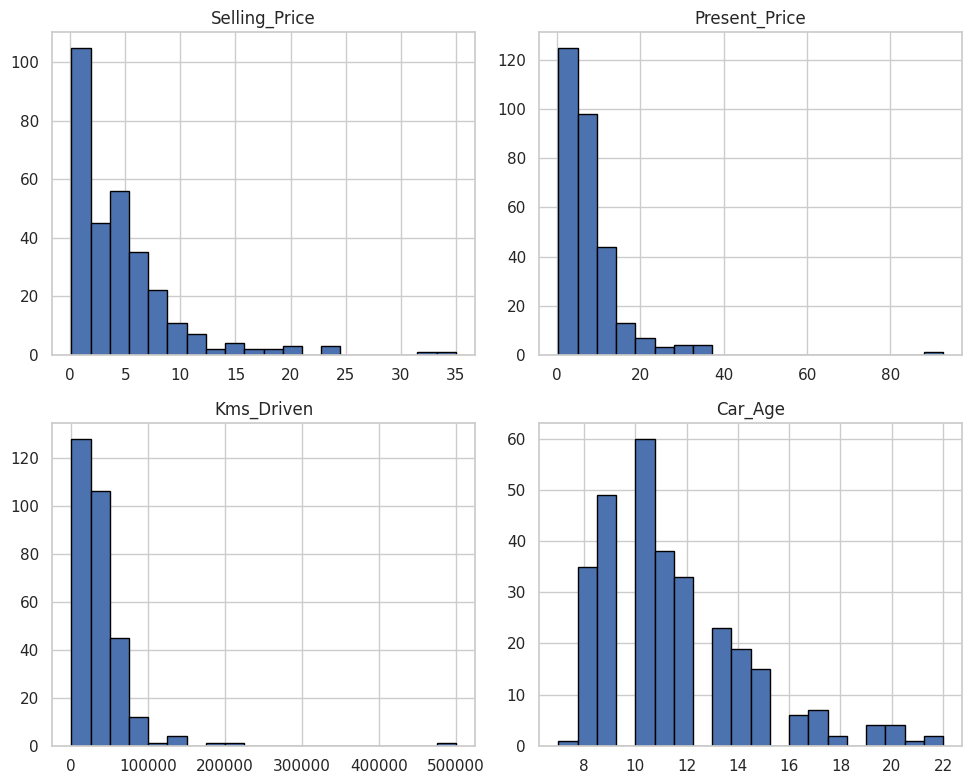

In [ ]:
# Plot histograms for numerical columns
df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']].hist(
    figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

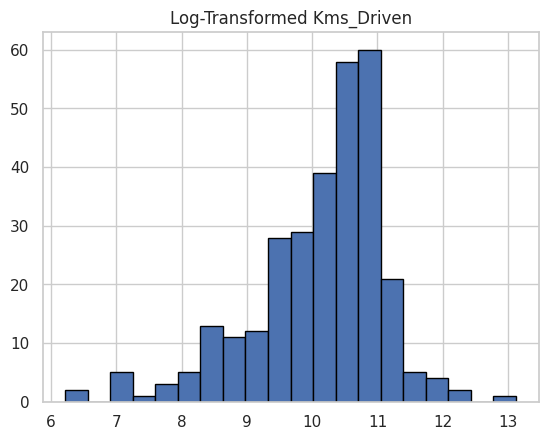

In [ ]:
df['Kms_Driven'] = np.log1p(df['Kms_Driven'])      # Apply log transformation to Kms_Driven
df['Kms_Driven'].hist(bins=20, edgecolor='black')  # Check transformation effect
plt.title("Log-Transformed Kms_Driven")
plt.show()

In [ ]:
df.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    print(f"{col}: {df[col].unique()}")

Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary columns
le = LabelEncoder()
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])     # Dealer=0, Individual=1
df['Transmission'] = le.fit_transform(df['Transmission'])   # Manual=1, Automatic=0

# One-hot encode 'Fuel_Type'
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)  # drop_first=True to avoid dummy trap

# Check the result
df.head()

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,10.203629,0,1,0,11,False,True
1,4.75,9.54,10.668979,0,1,0,12,True,False
2,7.25,9.85,8.839422,0,1,0,8,False,True
3,2.85,4.15,8.556606,0,1,0,14,False,True
4,4.60,6.87,10.656106,0,1,0,11,True,False


In [ ]:
corr_matrix = df.corr(numeric_only=True)                         # Compute correlation matrix
print(corr_matrix['Selling_Price'].sort_values(ascending=False)) # Print correlations with target

Selling_Price       1.000000
Present_Price       0.876378
Fuel_Type_Diesel    0.543541
Kms_Driven          0.121217
Owner              -0.087880
Car_Age            -0.234369
Transmission       -0.348869
Fuel_Type_Petrol   -0.531636
Seller_Type        -0.553851
Name: Selling_Price, dtype: float64


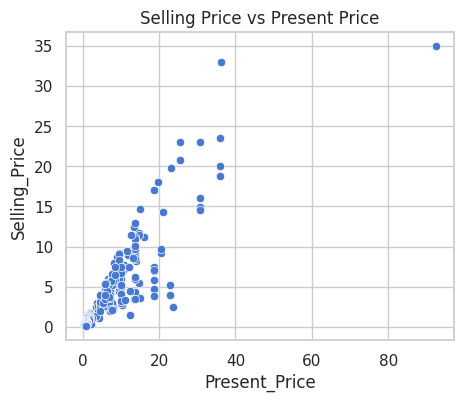

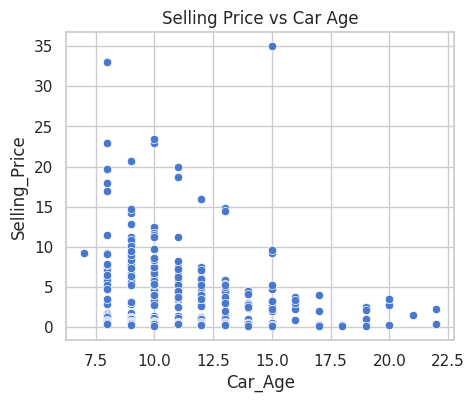

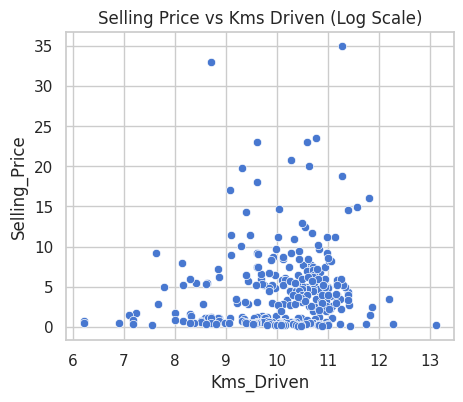

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style='whitegrid', palette='muted')

# Selling Price vs Present Price
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs Present Price')
plt.show()

# Selling Price vs Car Age
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title('Selling Price vs Car Age')
plt.show()

# Selling Price vs Kms Driven
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Selling Price vs Kms Driven (Log Scale)')
plt.show()

/tmp/ipython-input-16-4174817079.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.boxplot(x='Fuel_Type_Petrol', y='Selling_Price', data=df.replace({True: 1, False: 0}))


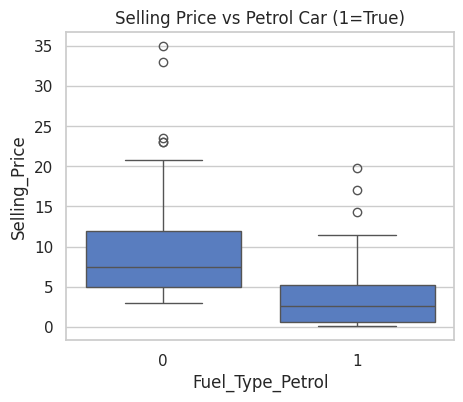

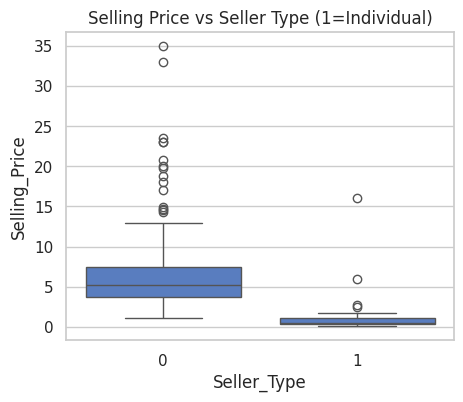

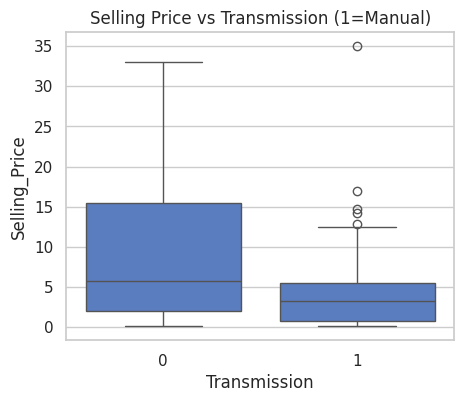

In [ ]:
# Set up plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Fuel Type vs Selling Price
plt.figure(figsize=(5, 4))
sns.boxplot(x='Fuel_Type_Petrol', y='Selling_Price', data=df.replace({True: 1, False: 0}))
plt.title('Selling Price vs Petrol Car (1=True)')
plt.show()

# Seller Type vs Selling Price
plt.figure(figsize=(5, 4))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Selling Price vs Seller Type (1=Individual)')
plt.show()

# Transmission vs Selling Price
plt.figure(figsize=(5, 4))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price vs Transmission (1=Manual)')
plt.show()

In [ ]:
# Define input features and target
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Sanity check
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (299, 8)
y shape: (299,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (239, 8)
X_test shape: (60, 8)
y_train shape: (239,)
y_test shape: (60,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                   # Initialize scaler
cols_to_scale = ['Present_Price', 'Kms_Driven', 'Car_Age']  # List of columns to scale

# Fit on training data, transform both train and test
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Preview
X_train.head()

,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol
6,0.079231,-0.220660,0,1,0,-0.463102,False,True
185,-0.775916,-2.469544,1,0,0,1.973282,False,True
187,-0.783855,0.301557,1,1,0,0.233008,False,True
148,-0.735086,0.636161,1,1,0,1.277172,False,True
31,-0.287098,0.818731,0,1,0,0.929117,False,True


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lr_model = LinearRegression()                     # Initialize and train the model
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)              # Predict on test set

mae_lr = mean_absolute_error(y_test, y_pred_lr)   # Evaluate
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MAE:", mae_lr)
print("Linear Regression R² Score:", r2_lr)

Linear Regression MAE: 1.4711295814451189
Linear Regression R² Score: 0.7463218695423834


In [ ]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(random_state=42)  # Initialize and train
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)               # Predict

mae_dt = mean_absolute_error(y_test, y_pred_dt)    # Evaluate
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MAE:", mae_dt)
print("Decision Tree R² Score:", r2_dt)

Decision Tree MAE: 1.0741666666666665
Decision Tree R² Score: 0.837781562252974


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize and train
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)             # Predict

mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Evaluate
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest R² Score:", r2_rf)

Random Forest MAE: 1.4995466666666677
Random Forest R² Score: 0.49503299916847465


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)   # Initialize the model

xgb_model.fit(X_train, y_train)                    # Train

y_pred_xgb = xgb_model.predict(X_test)             # Predict

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)  # Evaluate
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MAE:", mae_xgb)
print("XGBoost R² Score:", r2_xgb)

XGBoost MAE: 1.095074187686046
XGBoost R² Score: 0.7747729950494657


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Initialize the model

lgb_model.fit(X_train, y_train)                   # Train

y_pred_lgb = lgb_model.predict(X_test)            # Predict

mae_lgb = mean_absolute_error(y_test, y_pred_lgb) # Evaluate
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM MAE:", mae_lgb)
print("LightGBM R² Score:", r2_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 7
[LightGBM] [Info] Start training from score 4.583682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
print("LightGBM MAE:", mae_lgb)
print("LightGBM R² Score:", r2_lgb)

LightGBM MAE: 1.4364253132861948
LightGBM R² Score: 0.682917681243699


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, random_state=42)  # Initialize CatBoost with basic parameters

cat_model.fit(X_train, y_train)                     # Fit the model

y_pred_cat = cat_model.predict(X_test)              # Predict

mae_cat = mean_absolute_error(y_test, y_pred_cat)   # Evaluate
r2_cat = r2_score(y_test, y_pred_cat)

print("CatBoost MAE:", mae_cat)
print("CatBoost R² Score:", r2_cat)

CatBoost MAE: 0.8754119496423927
CatBoost R² Score: 0.8471491278573654


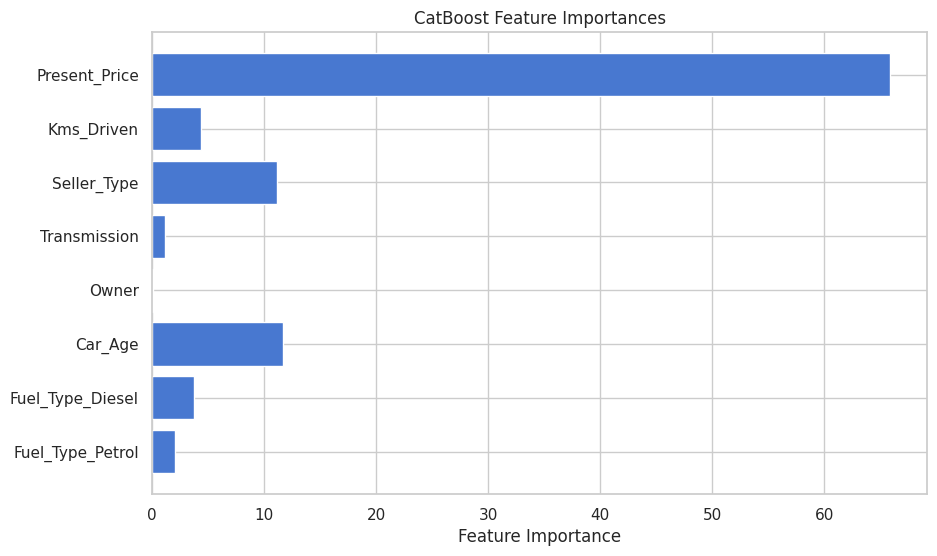

In [ ]:
import matplotlib.pyplot as plt

importances = cat_model.get_feature_importance()  # Get feature importances
features = X.columns

plt.figure(figsize=(10,6))                        # Plot
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def predict_car_price(present_price, kms_driven, seller_type, transmission, owner, car_age, fuel_type, model, scaler):
    """
    Predicts the selling price of a used car using a trained ML model and scaler.
    Parameters:
    - present_price: float
    - kms_driven: int
    - seller_type: str, either 'Dealer' or 'Individual'
    - transmission: str, either 'Manual' or 'Automatic'
    - owner: int (usually 0, 1, 2, or 3)
    - car_age: int (e.g., 5 if car is from 2020 and current year is 2025)
    - fuel_type: str, either 'Petrol', 'Diesel', or 'CNG'
    - model: trained ML model (e.g., CatBoost)
    - scaler: trained StandardScaler object
    Returns:
    - predicted_price: float, rounded to 2 decimal places
    """
    # Create dataframe
    new_data = pd.DataFrame({
        'Present_Price': [present_price],
        'Kms_Driven': [kms_driven],
        'Seller_Type': [0 if seller_type == 'Dealer' else 1],
        'Transmission': [1 if transmission == 'Manual' else 0],
        'Owner': [owner],
        'Car_Age': [car_age],
        'Fuel_Type_Diesel': [fuel_type == 'Diesel'],
        'Fuel_Type_Petrol': [fuel_type == 'Petrol']
    })
    # Log transform
    new_data['Kms_Driven'] = np.log(new_data['Kms_Driven'])

    # Scale features
    new_data[['Present_Price', 'Kms_Driven', 'Car_Age']] = scaler.transform(
        new_data[['Present_Price', 'Kms_Driven', 'Car_Age']]
    )
    # Predict
    predicted_price = model.predict(new_data)[0]
    return round(predicted_price, 2)

In [ ]:
# Example: Predict a car with these features
price = predict_car_price(
    present_price=7.5,
    kms_driven=40000,
    seller_type='Dealer',
    transmission='Manual',
    owner=0,
    car_age=5,
    fuel_type='Petrol',
    model=cat_model,
    scaler=scaler
)
print("Predicted Selling Price: ₹", price, "lakhs")

Predicted Selling Price: ₹ 5.46 lakhs
